In [152]:
Analysis: 

SyntaxError: invalid syntax (4060780798.py, line 1)

## Observations and Insights 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_results_dirty = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
complete_results_dirty.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [154]:
# Display Column names of the DataFrame
complete_results_dirty.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [155]:
# Checking the number of mice.
complete_results_dirty.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [156]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
show_duplicates_mouse = complete_results_dirty[complete_results_dirty.duplicated(["Mouse ID", "Timepoint"])]

show_duplicates_mouse.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [157]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = complete_results_dirty.loc[complete_results_dirty['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_results_clean = complete_results_dirty.drop_duplicates(["Mouse ID","Timepoint"])

In [159]:
# Checking the number of mice in the clean DataFrame.
complete_results_clean.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [160]:
complete_results_clean.value_counts("Drug Regimen")

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
dtype: int64

In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimen_group = complete_results_clean.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_table_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()

summary_table_median = drug_regimen_group["Tumor Volume (mm3)"].median()

summary_table_var = drug_regimen_group["Tumor Volume (mm3)"].var()

summary_table_std = drug_regimen_group["Tumor Volume (mm3)"].std()

summary_table_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_table_groupby = round(pd.DataFrame({ "Mean Tumor Volume":summary_table_mean,
                                      "Median Tumor Volume": summary_table_median,
                                      "Variance Tumor Volume": summary_table_var,
                                      "Standard Devation Tumor Volume": summary_table_std,
                                      "SEM Tumor Volume": summary_table_sem,}),2)

summary_table_groupby

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Devation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = round(drug_regimen_group["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)

summary_table_agg = summary_table_agg.rename(columns={"mean": "Mean Tumor Volume",
                                                      "median": "Median Tumor Volume",
                                                      "var": "Variance Tumor Volume",
                                                      "std":"Standard Devation Tumor Volume",
                                                      "sem":"SEM Tumor Volume"})

summary_table_agg

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Devation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

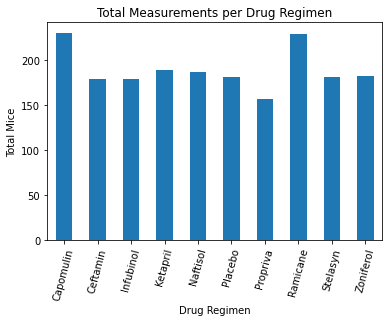

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_ct = drug_regimen_group["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 75, title = "Total Measurements per Drug Regimen", fontsize =10)
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot


In [164]:
drug_regimen_ct.head(9)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Total Mice')

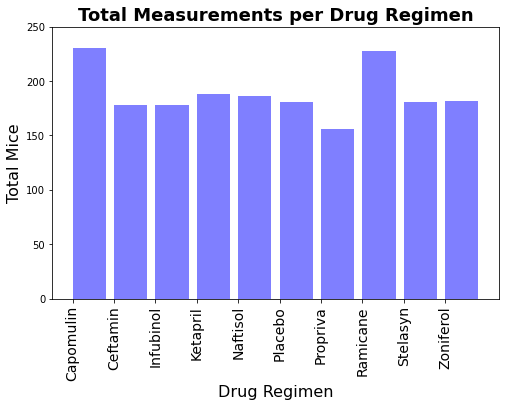

In [165]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_ct))
y_axis = drug_regimen_ct

tx = list(drug_regimen_ct.index.values)
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, tx, rotation="vertical", fontsize = 14)

plt.ylim(0, 250)

#plt.xticks(tick_locations, drug_regimen_group, rotation="vertical")
plt.title("Total Measurements per Drug Regimen",fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)

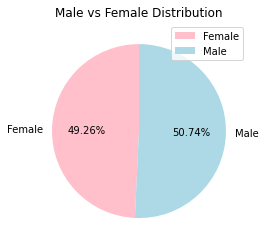

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_group = complete_results_clean.groupby(["Sex"]).count()


# Create a pie chart based upon the trip duration of that single bike
mf_pie_chart = mouse_sex_group.plot(kind="pie", y='Mouse ID', title=("Male vs Female Distribution"),
                            colors = ["pink","lightblue"], autopct='%.2f%%', startangle = 90 )
# Removes Mouse ID from graph
mf_pie_chart.set_ylabel("")
mf_pie_chart.legend(loc="best")

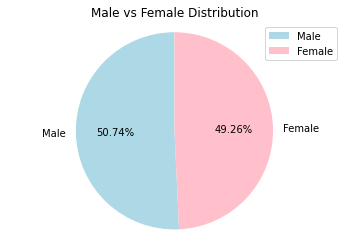

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_group_py = complete_results_clean["Sex"].value_counts()

labels = list(mouse_sex_group_py.index)
explode = (0,0)

plt.pie(mouse_sex_group_py, labels = labels, colors = [ "lightblue","pink"],
        autopct="%1.2f%%", startangle=90)
plt.axis("equal")
plt.title("Male vs Female Distribution")
plt.legend(loc = "best")

## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = complete_results_clean.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_maxtp_df = pd.merge(max_timepoint , complete_results_clean, on=(["Mouse ID","Timepoint"]))

In [169]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = complete_results_clean['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range is: {iqr}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The interquartile range is: 11.324075107499993


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

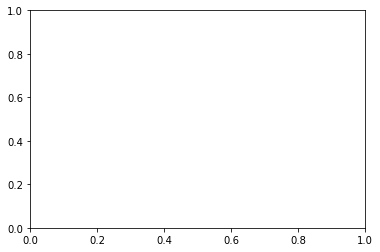

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(complete_results_clean)

## Line and Scatter Plots

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = complete_results_clean.loc[complete_results_clean["Drug Regimen"] == "Capomulin"]

#Show all mice treated with Capomulin - then choose one to pick out
capomulin_mouse.value_counts('Mouse ID')

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

Text(0, 0.5, 'Tumor Volume (mm3)')

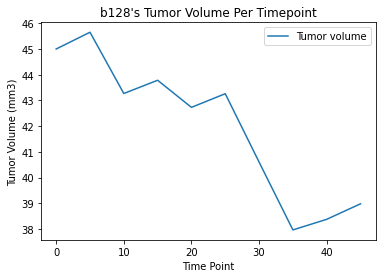

In [172]:
# Choose mouse from list - b128
Capomulin_b128 = complete_results_clean.loc[complete_results_clean["Mouse ID"] == "b128"]

#Generate line plot

x_axis = Capomulin_b128['Timepoint']
y_axis = Capomulin_b128['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, label="Tumor volume")
plt.legend(loc="best")
plt.title("b128's Tumor Volume Per Timepoint")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

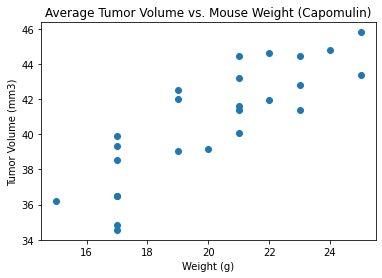

In [173]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_group = capomulin_mouse.groupby(['Mouse ID']).mean()

volume_avg = scatter_group['Tumor Volume (mm3)']
weight_avg = scatter_group['Weight (g)']

# 
plt.scatter(weight_avg, volume_avg)
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [174]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Mouse Weight and Tumor Volume is {round(st.pearsonr(weight_avg,volume_avg)[0],2)}")


The correlation coefficient between Mouse Weight and Tumor Volume is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

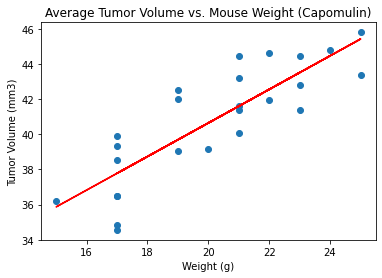

In [175]:
# get the slope and intercept 
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_avg, volume_avg)
regress_values = weight_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_avg, volume_avg)
plt.plot(weight_avg,regress_values,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")